In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report

In [60]:
df = pd.read_csv('d:/MY_REPOSITORY/depression_suicide_project/Pretrained_embedding_models/dataset/suicide/CSSRS/combined_CSSR_twitter_dataset.csv')

In [61]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df['class'] = LE.fit_transform(df['Label'])

df = df.sample(frac=1).reset_index(drop=True)

In [32]:
LE.classes_

array(['Attempt', 'Behavior', 'Ideation', 'Indicator', 'Supportive'],
      dtype=object)

In [24]:
df

,Unnamed: 0,Label,Post,class
0,1987,Behavior,risky thing emotionally high day deeply discou...,1
1,1716,Indicator,single episode early yaw skin lesion skin lesi...,3
2,2507,Ideation,live anymore family history senile dementia de...,2
3,1903,Behavior,pill hand potential injury harm concern author...,1
4,165,Ideation,senile dementia paranoia bless dementia rat sc...,2
...,...,...,...,...
3281,572,Ideation,feel suicidal actually intimidation couvade st...,2
3282,779,Ideation,lack sexual enjoyment dementia frontal lobe ty...,2
3283,1600,Ideation,intermittent explosive outburst mix disorder c...,2
3284,1808,Indicator,paw skin tag candidiasis skin iris coloboma pt...,3


In [62]:
# Split data into features (X) and labels (y)
X = df['Post']
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Define classifiers with specified parameters
classifiers = {
    'K Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(degree=2, gamma=0.7, kernel='rbf'),
    'Decision Tree': DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=2),
    'Random Forest': RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_features='sqrt'),
    'Neural Net (Multi-layer perceptron)': MLPClassifier(solver='adam', alpha=1, hidden_layer_sizes=(15,)),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R'),
#     'Gaussian Process': GaussianProcessClassifier(),
#     'Naive Bayes (GaussianNB)': GaussianNB(var_smoothing=1e-9)
}


In [39]:
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

In [35]:
# Create pipeline for each classifier
pipelines = {}
for name, clf in classifiers.items():
    pipelines[name] = Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('classifier', clf)
    ])

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

Training and evaluating K Nearest Neighbors...
K Nearest Neighbors - Accuracy: 0.8511, F1 Score: 0.8631, Precision: 0.8832, Recall: 0.8511
K Nearest Neighbors - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       150
           1       0.81      0.94      0.87       156
           2       0.94      0.81      0.87       172
           3       0.93      0.85      0.89       153
           4       0.18      0.33      0.23        27

    accuracy                           0.85       658
   macro avg       0.77      0.77      0.76       658
weighted avg       0.88      0.85      0.86       658




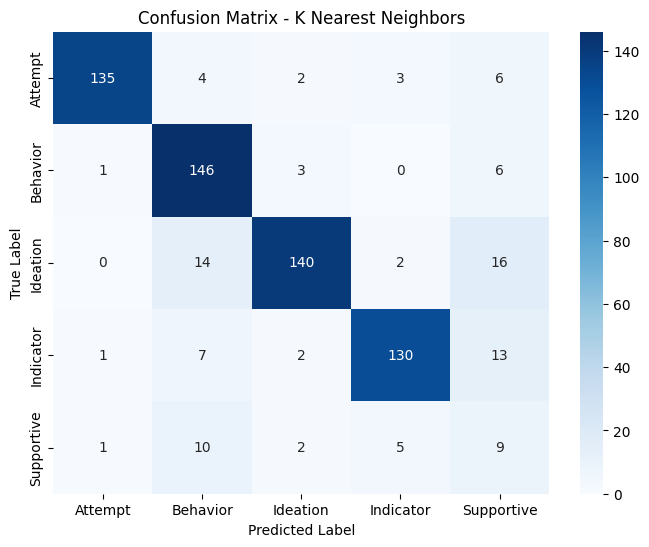

Training and evaluating SVM...


C:\Users\iftek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iftek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iftek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

SVM - Accuracy: 0.8784, F1 Score: 0.8660, Precision: 0.8729, Recall: 0.8784
SVM - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       150
           1       0.99      0.92      0.95       156
           2       0.69      1.00      0.82       172
           3       0.98      0.84      0.91       153
           4       0.00      0.00      0.00        27

    accuracy                           0.88       658
   macro avg       0.73      0.73      0.72       658
weighted avg       0.87      0.88      0.87       658




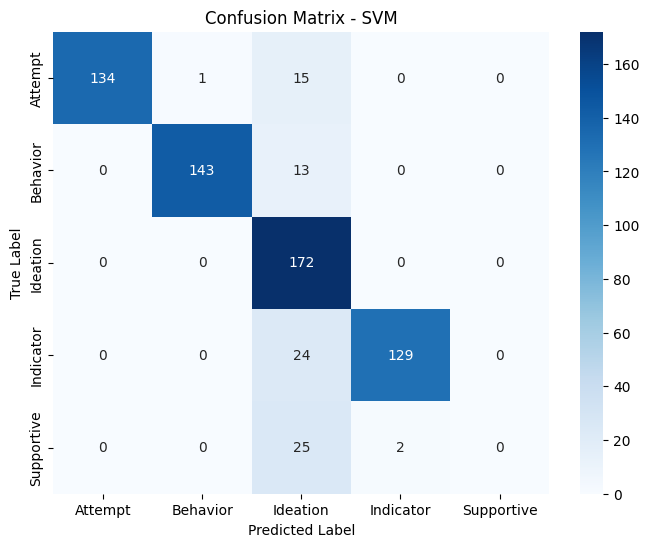

Training and evaluating Decision Tree...
Decision Tree - Accuracy: 0.8495, F1 Score: 0.8476, Precision: 0.8461, Recall: 0.8495
Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       150
           1       0.90      0.90      0.90       156
           2       0.80      0.84      0.82       172
           3       0.87      0.86      0.87       153
           4       0.27      0.22      0.24        27

    accuracy                           0.85       658
   macro avg       0.75      0.75      0.75       658
weighted avg       0.85      0.85      0.85       658




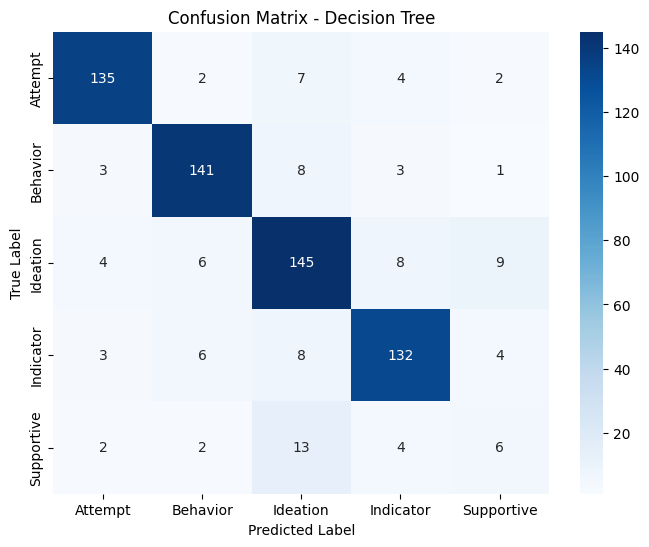

Training and evaluating Random Forest...
Random Forest - Accuracy: 0.8830, F1 Score: 0.8730, Precision: 0.9111, Recall: 0.8830
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       150
           1       0.98      0.93      0.95       156
           2       0.71      0.99      0.83       172
           3       0.98      0.84      0.91       153
           4       1.00      0.07      0.14        27

    accuracy                           0.88       658
   macro avg       0.93      0.75      0.75       658
weighted avg       0.91      0.88      0.87       658




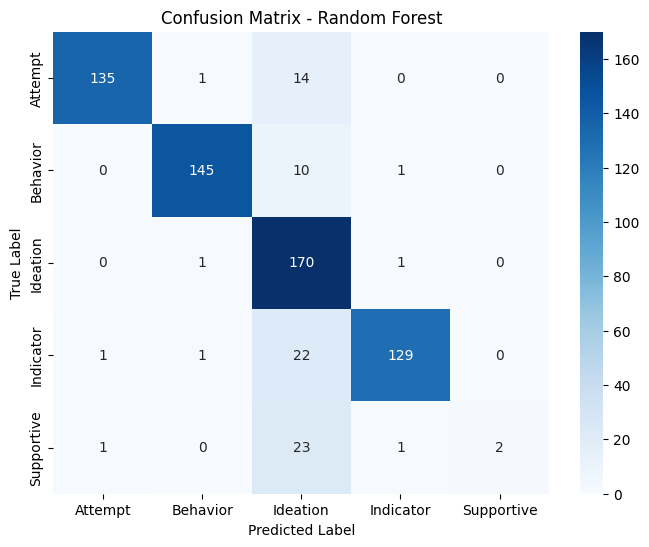

Training and evaluating Neural Net (Multi-layer perceptron)...
Neural Net (Multi-layer perceptron) - Accuracy: 0.8754, F1 Score: 0.8628, Precision: 0.8679, Recall: 0.8754
Neural Net (Multi-layer perceptron) - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       150
           1       0.97      0.92      0.95       156
           2       0.69      0.98      0.81       172
           3       0.98      0.84      0.91       153
           4       0.00      0.00      0.00        27

    accuracy                           0.88       658
   macro avg       0.73      0.73      0.72       658
weighted avg       0.87      0.88      0.86       658




C:\Users\iftek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iftek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iftek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

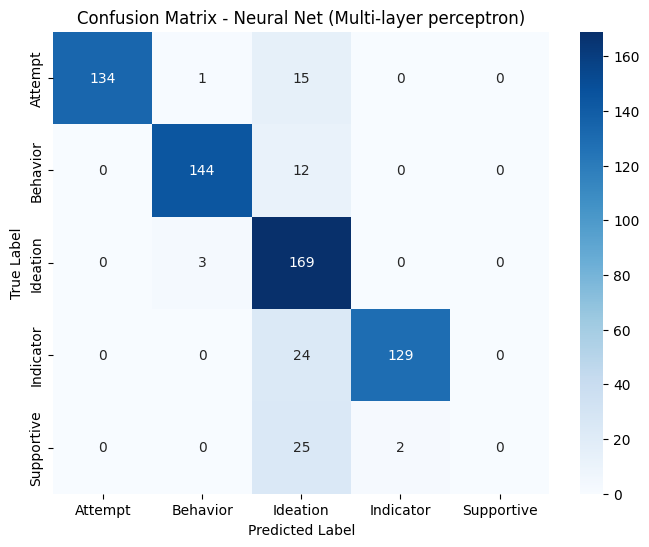

Training and evaluating AdaBoost...
AdaBoost - Accuracy: 0.8237, F1 Score: 0.8128, Precision: 0.8152, Recall: 0.8237
AdaBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       150
           1       0.81      0.90      0.85       156
           2       0.77      0.90      0.83       172
           3       0.86      0.88      0.87       153
           4       0.25      0.07      0.11        27

    accuracy                           0.82       658
   macro avg       0.72      0.70      0.70       658
weighted avg       0.82      0.82      0.81       658




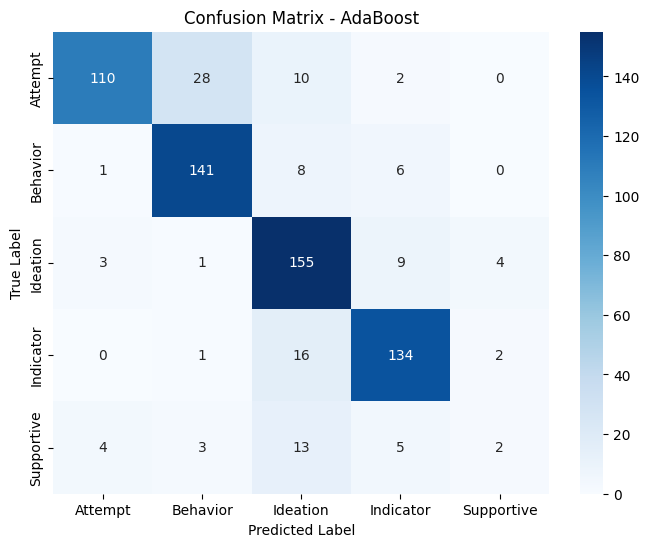

Training and evaluating Naive Bayes (GaussianNB)...


TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [37]:
## Train and evaluate each classifier
for name, pipeline in pipelines.items():
    print(f"Training and evaluating {name}...")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted average for multiclass F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Print classification report for detailed metrics
    print(f"{name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    print(f"{name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    print()
    
        # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LE.classes_, yticklabels=LE.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

In [40]:
# Define classifiers with specified parameters
classifiers = {
#     'K Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
#     'SVM': SVC(degree=2, gamma=0.7, kernel='rbf'),
#     'Decision Tree': DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=2),
#     'Random Forest': RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_features='sqrt'),
#     'Neural Net (Multi-layer perceptron)': MLPClassifier(solver='adam', alpha=1, hidden_layer_sizes=(15,)),
#     'AdaBoost': AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R'),
    'Gaussian Process': GaussianProcessClassifier(),
    'Naive Bayes (GaussianNB)': GaussianNB(var_smoothing=1e-9)
}

In [41]:
# Create pipeline for each classifier
pipelines = {}
for name, clf in classifiers.items():
    pipelines[name] = Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('to_dense', DenseTransformer()), 
        ('classifier', clf)
    ])

Accuracy: 0.8875
F1 Score: 0.8767
Precision: 0.8849
Recall: 0.8875


C:\Users\iftek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


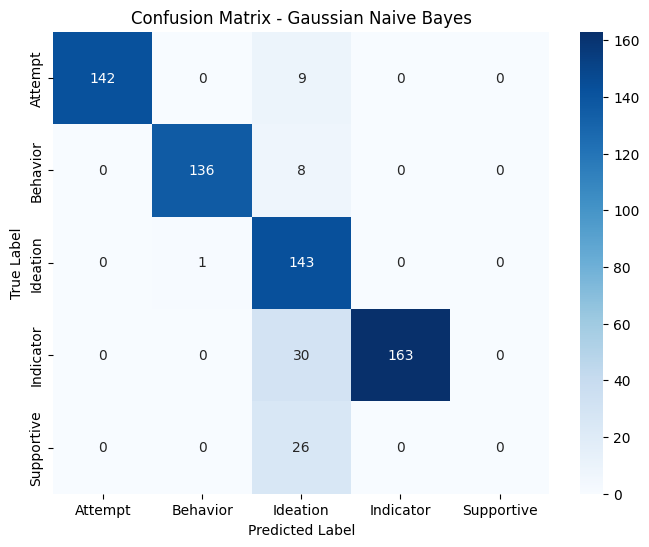

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

# Transform test data using CountVectorizer and TfidfTransformer
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Predict labels using the trained classifier
y_pred = clf.predict(X_test_tfidf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted average for multiclass F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

    # Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LE.classes_, yticklabels=LE.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - {name}')
plt.show()

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import FunctionTransformer


# # Sample DataFrame with text data and corresponding labels
# data = {
#     'text': ['This is a good day', 'I am happy', 'This is a bad day', 'I am sad'],
#     'label': [1, 2, 0, 2]  # Multiclass labels
# }
# df = pd.DataFrame(data)

# # Split data into features (X) and labels (y)
# X = df['text']
# y = df['label']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define TF-IDF vectorizer
# tfidf_vectorizer = TfidfVectorizer()

transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

# Define classifiers
classifiers = {
    'Gaussian Naive Bayes': GaussianNB()
}

# Create pipelines for each classifier with TF-IDF vectorization
pipelines = {}
for name, clf in classifiers.items():
    pipelines[name] = Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('dense', transformer),
        ('classifier', clf)
    ])

# Train and evaluate each classifier
for name, pipeline in pipelines.items():
    print(f"Training and evaluating {name}...")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Print evaluation metrics
    print(f"{name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} - Confusion Matrix:")
    print(cm)
    print()

Training and evaluating Gaussian Naive Bayes...
Gaussian Naive Bayes - Accuracy: 0.8875, F1 Score: 0.8820, Precision: 0.8865, Recall: 0.8875
Gaussian Naive Bayes - Confusion Matrix:
[[142   0   7   1   1]
 [  0 136   6   2   0]
 [  2   2 134   3   3]
 [  1   2  20 168   2]
 [  0   1  15   6   4]]



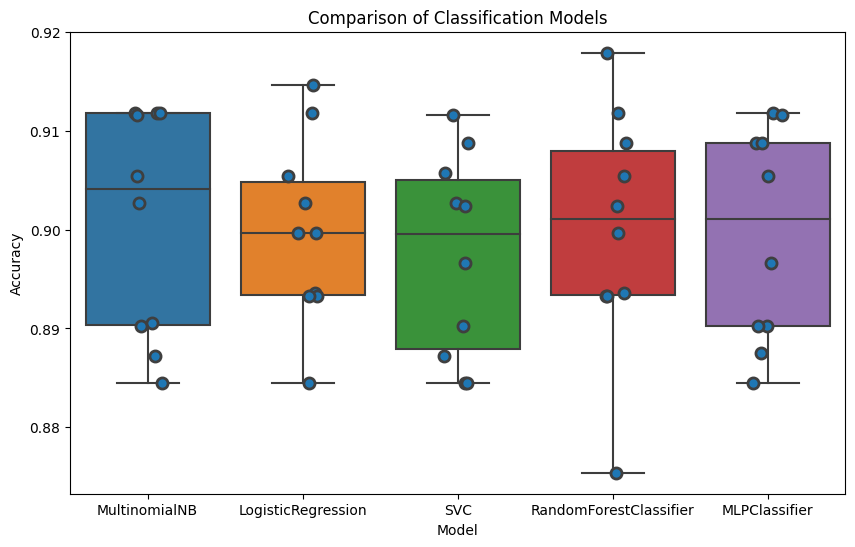

model_name
LogisticRegression        0.899880
MLPClassifier             0.899574
MultinomialNB             0.900789
RandomForestClassifier    0.900181
SVC                       0.897444
Name: accuracy, dtype: float64


In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Models to evaluate
models = [
    MultinomialNB(),
    LogisticRegression(random_state=0),
    SVC(degree=2, gamma=0.7, kernel='rbf'),
    RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_features='sqrt'),
    MLPClassifier(solver='adam', alpha=1, hidden_layer_sizes=(15,)),
]

CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    pipeline = Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('classifier', model)
    ])
    accuracies = cross_val_score(pipeline, X, y, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# Plotting the results
plt.figure(figsize=(10, 6))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.title('Comparison of Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# Print average accuracy scores
print(cv_df.groupby('model_name').accuracy.mean())
